In [ ]:
NAME = "Fahad Nadim Ziad"
ID = "24341216"
COLLABORATORS_ID = "NONE"

# Necessary library import

In [174]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float, color, util, filters, exposure, transform, feature, measure, morphology, restoration
from scipy import ndimage, signal

# Task 1 - Basic Image Operation

import your image or any photo taken by you (`sample.jpeg`) as a numpy array, save it in the varaible `I`.

A picture taken from your phone of any scenary/streets/building is better.

remember your image name MUST be `sample.jpeg`.

Make sure the height and the width of the image is **smaller than 1000 pixels**.

Height is 800
Width is 900


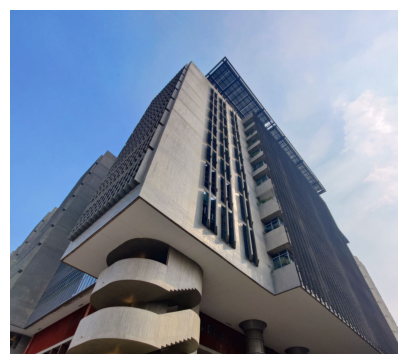

Image shape:  (800, 900, 3)


In [175]:
I = io.imread("/content/sample.jpg") # Replace None with appropriate function call line


# find the height and the width of the image
H, W = I.shape[:2]  # should contain height and width
print("Height is", H)
print("Width is", W)

### BEGIN SOLUTION
def plot_image(img, figsize=(5, 5), cmap=None): # add cmap argument
    plt.figure(figsize=figsize)
    if len(img.shape) == 2:
        plt.imshow(img, cmap=cmap or "gray") # using cmap if provided or default to gray
    else:
        plt.imshow(img)
    plt.axis("off")
    plt.show()
    print("Image shape: ", img.shape)

plot_image(I)
### END SOLUTION

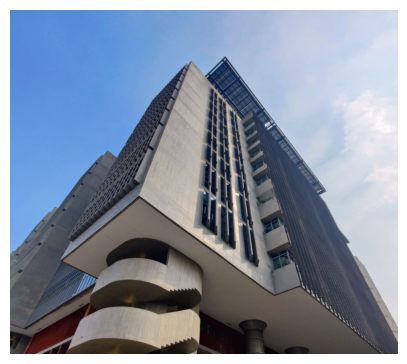

Image shape:  (800, 900, 3)


In [176]:
# Normalize the image so that the gray scales are between 0 and 1. Save it to I and display the image


### BEGIN SOLUTION

I = img_as_float(I)
plot_image(I)

### END SOLUTION

In [177]:
# Increase the brightness of the image without changing the contrast.
# Save the resulting image in I_bright and display it.

### BEGIN SOLUTION

I_bright = np.clip(I + 0.3, 0, 1)
plot_image(I_bright)

### END SOLUTION

Image shape:  (800, 900, 3)


In [178]:
# Decrease the brightness of the image without changing the contrast.
# Save the resulting image in I_dark and display it.


### BEGIN SOLUTION

I_dark = np.clip(I - 0.4, 0, 1)
plot_image(I_dark)

### END SOLUTION

Image shape:  (800, 900, 3)


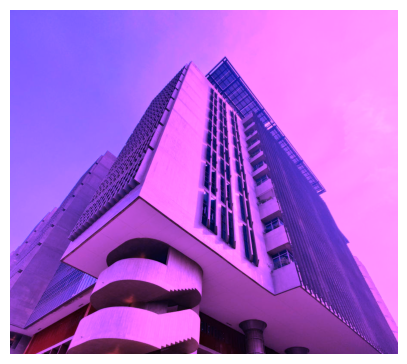

Image shape:  (800, 900, 3)


In [179]:
# Multiply the three channels of image I with three DIFFERENT numbers between 0.3 and 3
# Save the resulting image in I_tint and display it.
# The resulting image should have some color shift
# I_tint = None

# HINT:
# I_tint = np.zeros(I.shape)
# I_tint[:, :, 0] =  ..... I[:, :, 0].....
# ......

### BEGIN SOLUTION

I_tint = np.zeros(I.shape)
I_tint[:, :, 0] = np.clip(I[:, :, 0] * 1.5, 0, 1)  # Red channel boost
I_tint[:, :, 1] = np.clip(I[:, :, 1] * 0.7, 0, 1)  # Green channel down
I_tint[:, :, 2] = np.clip(I[:, :, 2] * 2.0, 0, 1)  # Blue channel way up

plot_image(I_tint)

### END SOLUTION

In [180]:
# Convert the image into a grayscale image.
# Save it to I_gray and display it
# I_gray = None

### BEGIN SOLUTION

I_gray = color.rgb2gray(I)
plot_image(I_gray)

### END SOLUTION

Image shape:  (800, 900)


In [181]:
# Display the negative of the grayscale image

### BEGIN SOLUTION

plot_image(1 - I_gray)

### END SOLUTION

Image shape:  (800, 900)


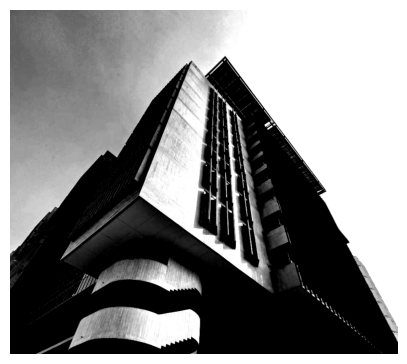

Image shape:  (800, 900)


In [182]:
# Artificially degrade the **grayscale image** by reducing it contrast
# You can do so by recaling the gray values and concentrating them in a narrow range,
# say between 0.4 and 0.7.
# Save the image as I_degraded and display it
# HINT: SEE lab-3-codes

# I_degraded = None

### BEGIN SOLUTION

I_degraded = exposure.rescale_intensity(I_gray, in_range=(0.4, 0.7), out_range=(0, 1))
plot_image(I_degraded)

### END SOLUTION

In [183]:
# Complete the following function to perform Piecewise Linear Contrast stretching
# That is, implement the map shown in Slide 17 of Lecture 3

# Prototype: piecewise_contrast_stretch(I_gray, r1, r2, s1, s2)
# Assuming both input and output images are normalized between 0 and 1


### BEGIN SOLUTION

def piecewise_contrast_stretch(I, r1, r2, s1, s2):
    I_stretched = np.zeros_like(I, dtype=np.float64)  # Initialize output image

    # Applying piecewise mapping
    I_stretched[I < r1] = (s1 / r1) * I[I < r1]
    I_stretched[(I >= r1) & (I <= r2)] = ((s2 - s1) / (r2 - r1)) * (I[(I >= r1) & (I <= r2)] - r1) + s1
    I_stretched[I > r2] = ((1 - s2) / (1 - r2)) * (I[I > r2] - r2) + s2

    return I_stretched


### END SOLUTION



In [184]:
# To test your implementation, contrast strech the degraded image I_degrade

# Display the strtched image

### BEGIN SOLUTION
r1 = 0.4
r2 = 0.7
s1 = 0.1
s2 = 0.9

I_stretched = piecewise_contrast_stretch(I_degraded, r1, r2, s1, s2)

plot_image(I_stretched)
### END SOLUTION

Image shape:  (800, 900)


# Task 2 - Histogram and Equalization

In [185]:
# Plot the Image and its histogram + cdf of the original image I
# Note that it is a color image, so it will have three different histograms

### BEGIN SOLUTION

def plot_image_hist_cdf(img, title=''):
    plt.figure(figsize=(18, 4))
    plt.subplot(1, 3, 1)
    if len(img.shape) == 2:  # Grayscale
        plt.imshow(img, cmap='gray')
        hist, bins = exposure.histogram(img, nbins=256)
        cdf = np.cumsum(hist) / np.sum(hist)
        plt.subplot(1, 3, 2)
        plt.plot(bins, hist, color='gray')
        plt.title('Histogram')
        plt.subplot(1, 3, 3)
        plt.plot(bins, cdf, color='gray')
        plt.title('CDF')
    else:  # Color
        plt.imshow(img)
        for i, c in enumerate(['r', 'g', 'b']):
            hist, bins = exposure.histogram(img[:, :, i], nbins=256)
            cdf = np.cumsum(hist) / np.sum(hist)
            plt.subplot(1, 3, 2)
            plt.plot(bins, hist, color=c)
            plt.title('Histogram')
            plt.subplot(1, 3, 3)
            plt.plot(bins, cdf, color=c)
            plt.title('CDF')
    plt.suptitle(title)
#
    plt.show()

plot_image_hist_cdf(I, 'Original Image')

### END SOLUTION

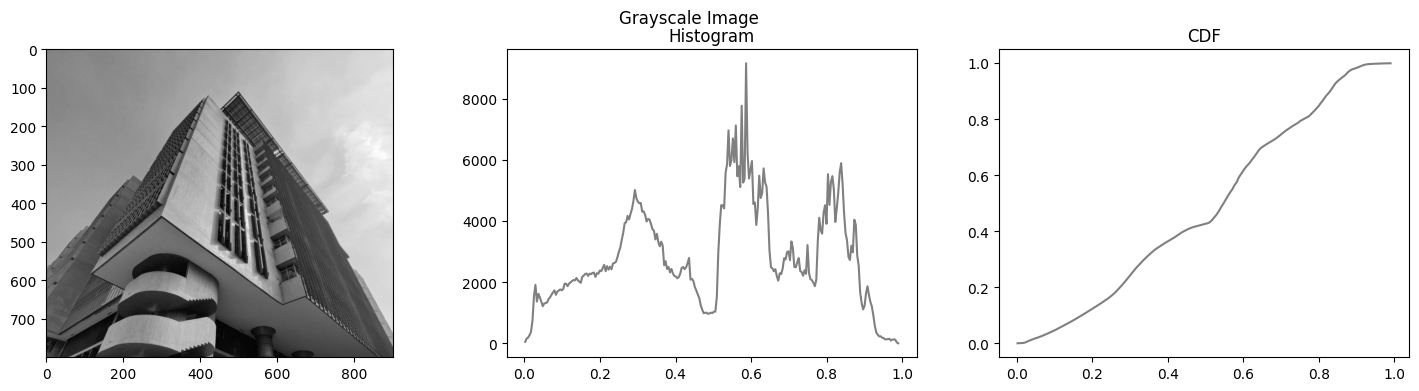

In [186]:
# Plot the Image and its histogram + cdf of the grayscale image I_gray

### BEGIN SOLUTION
plot_image_hist_cdf(I_gray, 'Grayscale Image')
### END SOLUTION

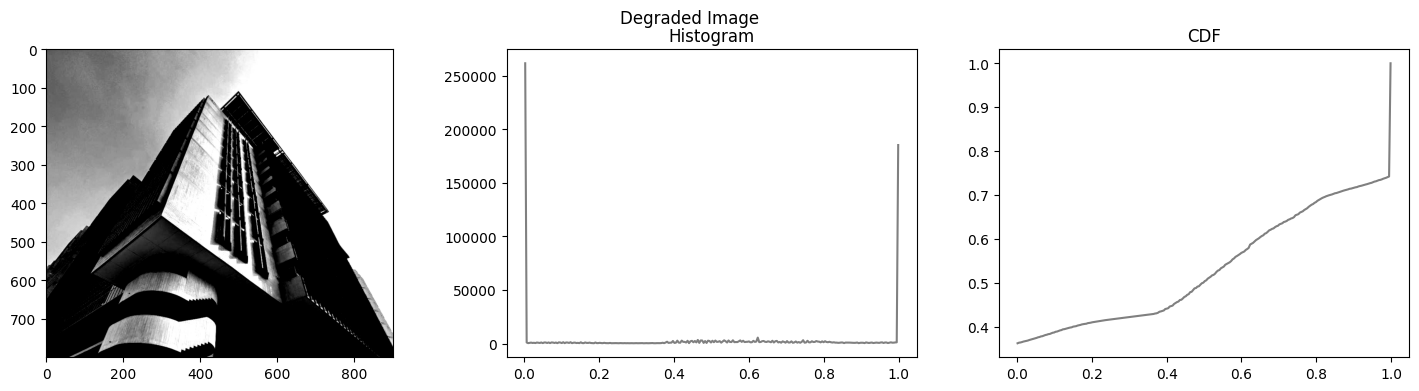

In [187]:
# Plot the Image and its histogram + cdf of the degraded image I_degraded

### BEGIN SOLUTION
plot_image_hist_cdf(I_degraded, 'Degraded Image')
### END SOLUTION

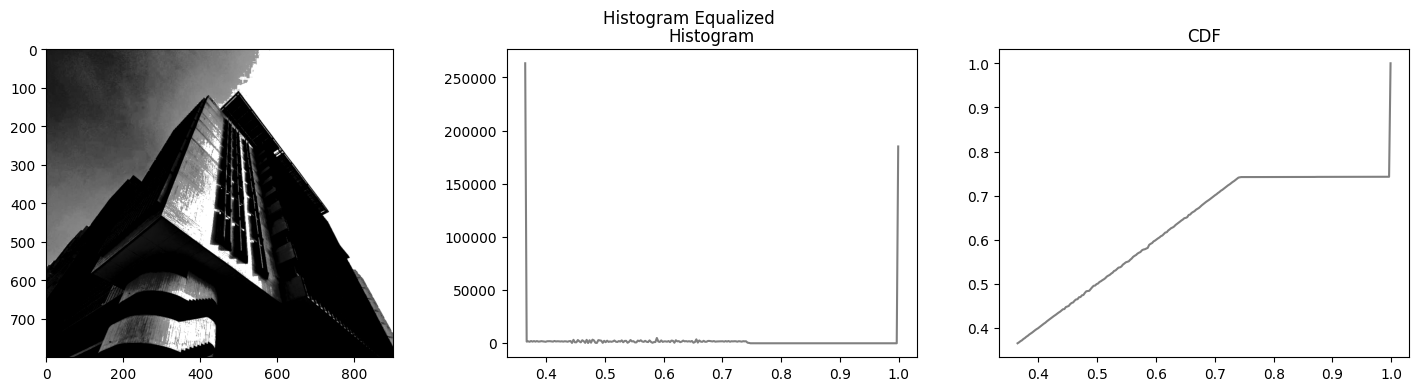

In [188]:
# Equalize the histogram of the degraded image I_degraded
# Save the result in I_recon_gray, display the image along with its histogram

# I_recon_gray = None

### BEGIN SOLUTION
I_recon_gray = exposure.equalize_hist(I_degraded)
plot_image_hist_cdf(I_recon_gray, 'Histogram Equalized')
### END SOLUTION

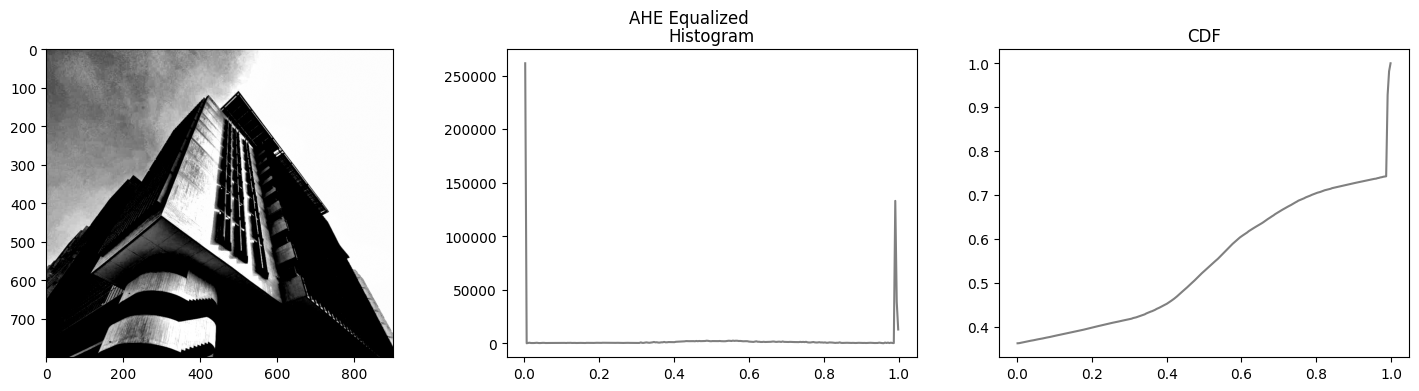

In [189]:
# Equalize the histogram of the degraded image I_degraded using AHE
# Save the result in I_recon_gray_2, display the image along with its histogram

# I_recon_gray_2 = None

### BEGIN SOLUTION
I_recon_gray_2 = exposure.equalize_adapthist(I_degraded)
plot_image_hist_cdf(I_recon_gray_2, 'AHE Equalized')
### END SOLUTION

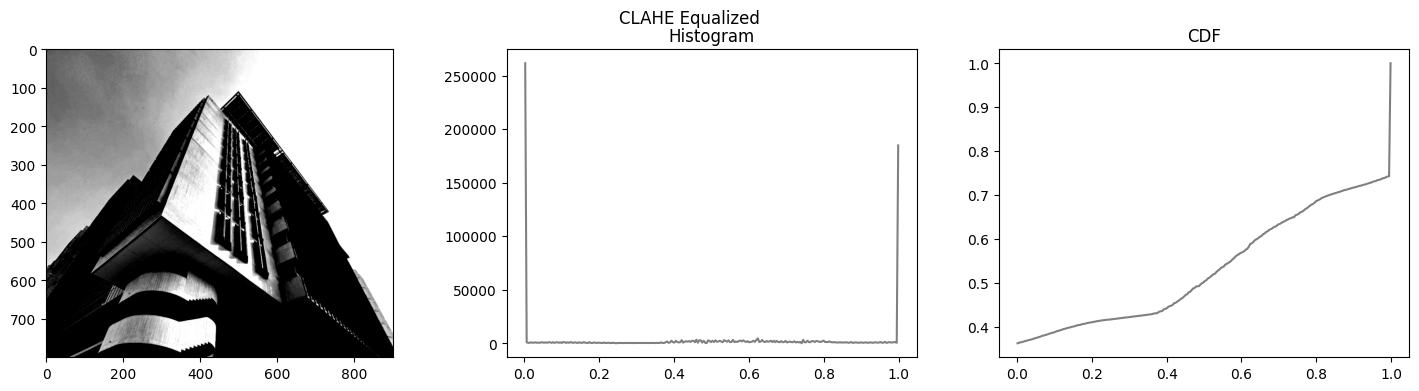

In [190]:
# Equalize the histogram of the degraded image I_degraded using CLAHE
# Save the result in I_recon_gray_2, display the image along with its histogram

# I_recon_gray_3 = None

### BEGIN SOLUTION
I_recon_gray_3 = exposure.equalize_adapthist(I_degraded, clip_limit=0.001)
plot_image_hist_cdf(I_recon_gray_3, 'CLAHE Equalized')
### END SOLUTION

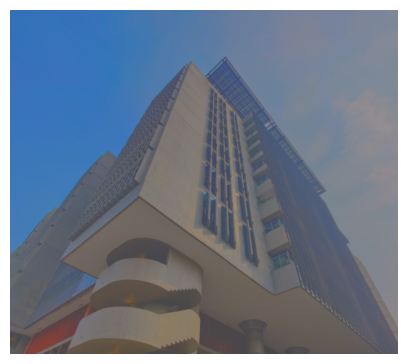

Image shape:  (800, 900, 3)


In [191]:
# Artificially degrade the original **RGB image** by reducing it contrast
# You can do so by recaling the values of the L channel (in LAB color space)
# and concentrating them in a narrow range, say between 0.3 and 0.6.
# Save the image as I_rgb_degraded and display it

# I_rgb_degraded = None

### BEGIN SOLUTION
I_lab = color.rgb2lab(I)
L = I_lab[:, :, 0]
min_L = np.min(L)
max_L = np.max(L)
L_degraded = 30 + (L - min_L) * 30 / (max_L - min_L)  # Map to [30, 60]
I_lab_degraded = I_lab.copy()
I_lab_degraded[:, :, 0] = L_degraded
I_rgb_degraded = color.lab2rgb(I_lab_degraded)
plot_image(I_rgb_degraded)
### END SOLUTION

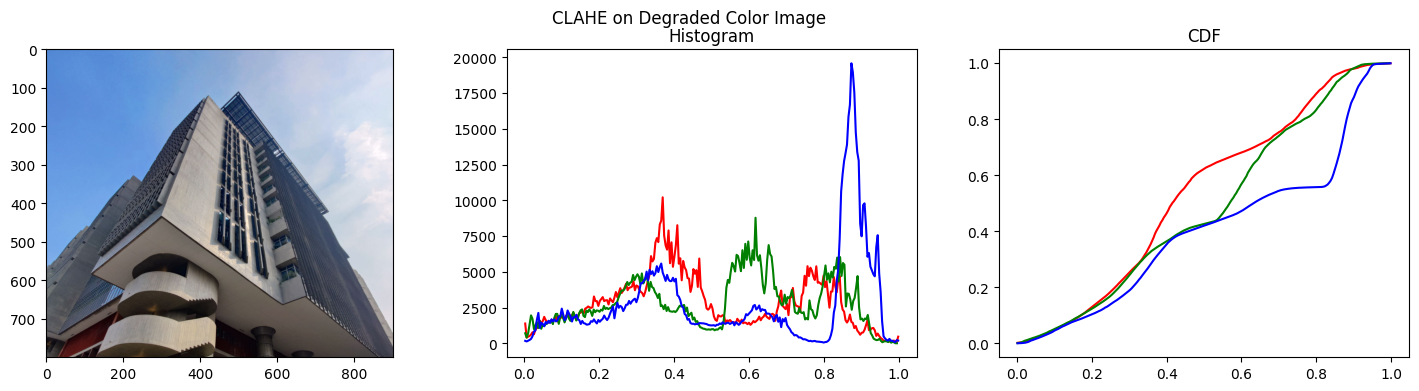

In [192]:
# Equalize the histogram of the degraded color image I_rgb_degraded using CLAHE
# Save the result in I_recon_color, display the image along with its histogram
# HINT: You have to convert to LAB first
# See the lecture and lecture-4-demo-codes

# I_recon_color = None

### BEGIN SOLUTION
L_norm = L_degraded / 100  # Normalize to [0, 1]
L_clahe = exposure.equalize_adapthist(L_norm, clip_limit=0.002)
I_lab_recon = I_lab_degraded.copy()
I_lab_recon[:, :, 0] = L_clahe * 100  # Scale back to [0, 100]
I_recon_color = color.lab2rgb(I_lab_recon)
plot_image_hist_cdf(I_recon_color, 'CLAHE on Degraded Color Image')
### END SOLUTION

# Task 3 - Open Ended
 ## ***There are 3 images in the drive directory below. Look at the questions from the brackets [.]. Answer them in the provided text cell at the bottom.***

 ### **Link:  https://drive.google.com/drive/folders/1hDUt0OnoSdSrrbYMSGbJB1-kTpXXdzcY?usp=sharing**


In [193]:
# Dark_Room.jpg = very dark [The windows are on walls. How does the wall look like?]
# Foggy_Road.jpg = washed out/foggy [How many vehicles do you think there are?]
# Read_the_code.jpg = Dark RGB Barcode [What is hidden in the Barcode?
#                                       Make it scanable, scan it and say something about the hidden message.]

# Your task is to improve these images using
# contrast stretching, histogram equalization, AHE or CLAHE
# try different combination of parameter settings to see which produces the best result



### BEGIN SOLUTION

### END SOLUTION


FOGGY ROAD



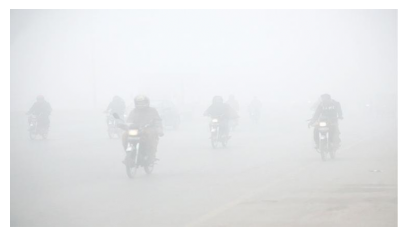

Image shape:  (423, 752, 3)

After conversion:

1. Histogram Equalization: 


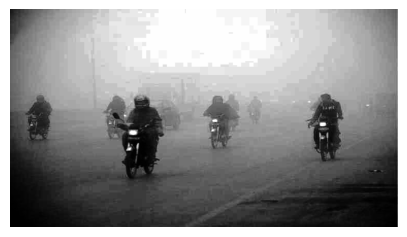

Image shape:  (423, 752, 3)
2. Adaptive Histogram Equalization (AHE): 


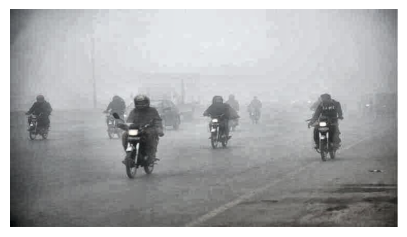

Image shape:  (423, 752, 3)
3. Contrast Limited Adaptive Histogram Equalization (CLAHE): 


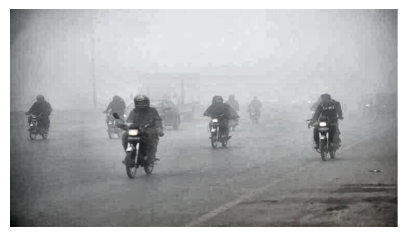

Image shape:  (423, 752, 3)
4. Contrast Stretching: 


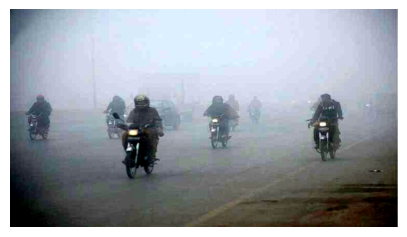

Image shape:  (423, 752, 3)



In [194]:
# --- Foggy_Road.jpg ---
# Load and convert the image
print()
print("FOGGY ROAD")
print()
foggy_road = io.imread('/content/Foggy_Road.jpg')
foggy_road = img_as_float(foggy_road)
plot_image(foggy_road, figsize=(5, 5))
print()
print("After conversion:")
print()

# --- Enhancement Techniques ---
print("1. Histogram Equalization: ")
# 1. Histogram Equalization (HE)
foggy_road_he = exposure.equalize_hist(color.rgb2gray(foggy_road)) # Apply HE to grayscale image
foggy_road_he = color.gray2rgb(foggy_road_he) # Convert back to RGB
plot_image(foggy_road_he, figsize=(5, 5))

print("2. Adaptive Histogram Equalization (AHE): ")
# 2. Adaptive Histogram Equalization (AHE)
foggy_road_lab = color.rgb2lab(foggy_road)
# Normalize the L channel to the range of 0 to 1 before applying AHE
foggy_road_lab[:, :, 0] = exposure.equalize_adapthist(foggy_road_lab[:, :, 0] / 100.0) * 100
foggy_road_ahe = color.lab2rgb(foggy_road_lab)
plot_image(foggy_road_ahe, figsize=(5, 5))

print("3. Contrast Limited Adaptive Histogram Equalization (CLAHE): ")
# 3. Contrast Limited Adaptive Histogram Equalization (CLAHE)
foggy_road_lab = color.rgb2lab(foggy_road)
L, A, B = foggy_road_lab[:, :, 0], foggy_road_lab[:, :, 1], foggy_road_lab[:, :, 2]
L_enhanced = exposure.equalize_adapthist(L / 100, clip_limit=0.009) * 100
foggy_road_lab_enhanced = np.stack([L_enhanced, A, B], axis=2)
foggy_road_enhanced = color.lab2rgb(foggy_road_lab_enhanced)
plot_image(foggy_road_enhanced, figsize=(5, 5))


print("4. Contrast Stretching: ")
# 4. Contrast Stretching
p2, p98 = np.percentile(foggy_road, (2, 98))
foggy_road_stretched = exposure.rescale_intensity(foggy_road, in_range=(p2, p98))
plot_image(foggy_road_stretched, figsize=(5, 5))


print()

DARK ROOM



Image shape:  (342, 600, 3)

After conversion:

1. Histogram Equalization: 


Image shape:  (342, 600)
2. Adaptive Histogram Equalization (AHE): 


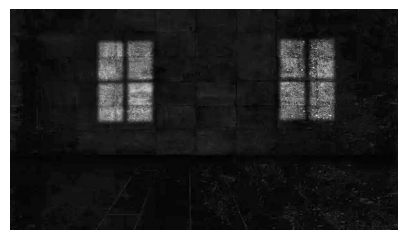

Image shape:  (342, 600)
3. Contrast Limited Adaptive Histogram Equalization (CLAHE): 


Image shape:  (342, 600)
4. Contrast Stretching: 


Image shape:  (342, 600)



In [195]:
# --- Dark_Room.jpg ---
# Load and convert the image
print("DARK ROOM")
print()
dark_room = io.imread('/content/Dark_Room.jpg')
dark_room = img_as_float(dark_room)
plot_image(dark_room, figsize=(5, 5))
print()
print("After conversion:")
print()

# Convert to grayscale for better enhancement
dark_room_gray = color.rgb2gray(dark_room)

print("1. Histogram Equalization: ")
# 1. Histogram Equalization (HE)
dark_room_he = exposure.equalize_hist(dark_room_gray)
plot_image(dark_room_he, figsize=(5, 5), cmap='gray')

print("2. Adaptive Histogram Equalization (AHE): ")
# 2. Adaptive Histogram Equalization (AHE)
dark_room_ahe = exposure.equalize_adapthist(dark_room_gray)  # Adjust clip_limit as needed
plot_image(dark_room_ahe, figsize=(5, 5), cmap='gray')

print("3. Contrast Limited Adaptive Histogram Equalization (CLAHE): ")
# 3. Contrast Limited Adaptive Histogram Equalization (CLAHE)
dark_room_clahe = exposure.equalize_adapthist(dark_room_gray, clip_limit=0.02)  # Adjust clip_limit as needed
plot_image(dark_room_clahe, figsize=(5, 5), cmap='gray')


print("4. Contrast Stretching: ")
# 4. Contrast Stretching
p2, p98 = np.percentile(dark_room_gray, (2, 98))
dark_room_stretched = exposure.rescale_intensity(dark_room_gray, in_range=(p2, p98))
plot_image(dark_room_stretched, figsize=(5, 5), cmap='gray')


print()


QRCODE



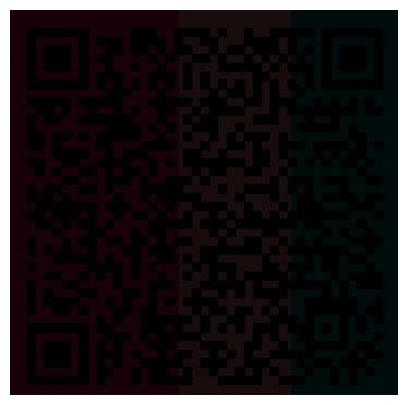

Image shape:  (343, 345, 3)

After conversion:



Image shape:  (343, 345)


In [196]:
# --- Read_the_code.jpg ---
# Load and convert the image
print()
print("QRCODE")
print()
barcode = io.imread('/content/Read_the_code.jpg')
barcode = img_as_float(barcode)
plot_image(barcode, figsize=(5, 5))
print()
print("After conversion:")
print()
# Convert to grayscale
barcode_gray = color.rgb2gray(barcode)

# Apply contrast stretching using percentiles for dynamic range
p2, p98 = np.percentile(barcode_gray, (2, 98))
barcode_stretched = exposure.rescale_intensity(barcode_gray, in_range=(p2, p98))

# Apply Otsu's thresholding to create a binary image for scanning
barcode_thresh = filters.threshold_otsu(barcode_stretched)
barcode_binary = barcode_stretched > barcode_thresh

# Display the enhanced binary image
plot_image(barcode_binary, figsize=(5, 5), cmap='gray')

### Your answers:


#### ***1. Dark_Room.jpg:***  The walls appear to have paneling or a textured surface, possibly wood or tiles with a repeating pattern of square/rectangle shapes.




               

#### ***2. Foggy_Road.jpg:***  Despite the fog, approximately some vehicles are seen on the road like a hazy seen truck, few clearly seen bikes(probably 7), one car and some background hazy vehicle headlights.



              

#### ***3. Read_the_code.jpg:***  The barcode contains this doc link: [CSE428: Image Processing](https://docs.google.com/document/d/1Y3Z_DvDcCJG9a0C4N4CMfX4KM5wGP-cxBekb8WT2cfg/edit?usp=sharing) -> Contains Theory References & Practice Problems
